In [89]:
import code.runners as gr
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [90]:
# load the results
with open('result_score/policy_results.pkl', 'rb') as f:
    policy_results = pickle.load(f)

with open('result_score/policy_baseline_results.pkl', 'rb') as f:
    policy_baseline_results = pickle.load(f)

with open('result_score/policy_actor_critic_results.pkl', 'rb') as f:
    policy_actor_critic_results = pickle.load(f)
    
with open('result_score/policy_actor_critic_results_big_net.pkl', 'rb') as f:
    policy_actor_critic_big_net_results = pickle.load(f)


In [94]:
section1_policies = [
    policy_results,
    policy_baseline_results
]

section1_labels = [
    "REINFORCE Policy",
    "REINFORCE with Baseline Policy"
]

section2_policies = [
    policy_results,
    policy_baseline_results,
    policy_actor_critic_results,
    policy_actor_critic_big_net_results
]

section2_labels = [
    "REINFORCE Policy",
    "REINFORCE with Baseline Policy",
    "REINFORCE with actor critic policy",
    "REINFORCE with actor critic big net policy",

]

### Compare Policies Duration

In [117]:
import numpy as np
import matplotlib.pyplot as plt

def compare_n_policies_duration(policy_results_list, labels, xticks_rot=0):
    """
    Compares and plots the average training duration among n different policies. Also prints the average
    training duration for each policy.

    Parameters:
    - policy_results_list: A list of lists, where each inner list contains dictionaries for a policy, each dictionary containing the 'Duration' key.
    - labels: A list of string labels for each policy.
    - xticks_rot: Degrees to rotate the x-axis labels for better readability. Default is 0.
    """
    if len(policy_results_list) != len(labels):
        raise ValueError("The number of policy results and labels must match.")
    
    # Extract and calculate average durations for each policy
    avg_durations = []
    for policy_results, label in zip(policy_results_list, labels):
        # Calculate average duration for the current policy
        avg_duration = np.mean([result['Duration'] for result in policy_results])
        avg_durations.append(avg_duration)
        
        # Print the average duration for the current policy
        print(f"Average training duration for {label}: {avg_duration:.2f} seconds")
    
    # Plotting the comparison
    plt.figure(figsize=(8, 5))
    plt.bar(labels, avg_durations)
    plt.ylabel('Average Duration (Seconds)')
    plt.title('Comparison of Training Duration Among Policies')
    plt.xticks(rotation=xticks_rot)  # Rotate labels if necessary for better readability
    plt.show()


def plot_duration_distribution_across_policies(policy_results_list, labels):
    """
    Plots the distribution of durations for each policy, considering all models.
    
    Parameters:
    - policy_results_list: A list where each item represents a policy and contains a list of dictionaries,
      each dictionary corresponding to a model's results.
    - labels: A list of string labels for each policy.
    """
    plt.figure(figsize=(8, 5))
    
    for policy_results, label in zip(policy_results_list, labels):
        # Extract all durations from all models within this policy
        all_durations = []
        for model_results in policy_results:
            all_durations.append(model_results['Duration'])
        
        # Plot the duration distribution for this policy
        plt.hist(all_durations, bins=50, alpha=0.7, label=f'{label} Duration Distribution', density=True)
    
    plt.xlabel('Duration (Seconds)')
    plt.ylabel('Density')
    plt.title('Distribution of Durations Across Policies')
    plt.legend()
    plt.show()

Average training duration for REINFORCE Policy: 177.47 seconds
Average training duration for REINFORCE with Baseline Policy: 205.01 seconds


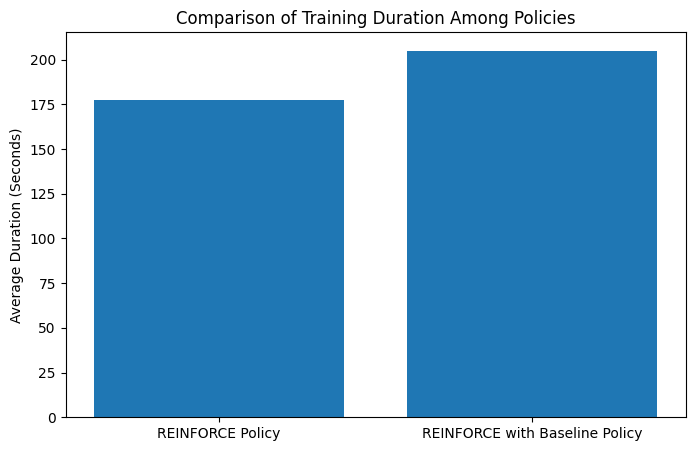

In [118]:
compare_n_policies_duration(
    policy_results_list=section1_policies,
    labels=section1_labels
)

Average training duration for REINFORCE Policy: 177.47 seconds
Average training duration for REINFORCE with Baseline Policy: 205.01 seconds
Average training duration for REINFORCE with actor critic policy: 396.09 seconds
Average training duration for REINFORCE with actor critic big net policy: 428.69 seconds


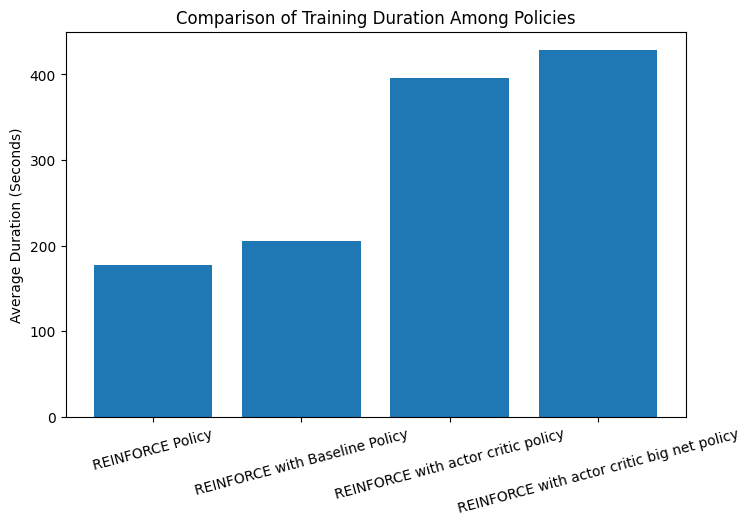

In [119]:
compare_n_policies_duration(
    policy_results_list=section2_policies,
    labels=section2_labels,
    xticks_rot=15
)

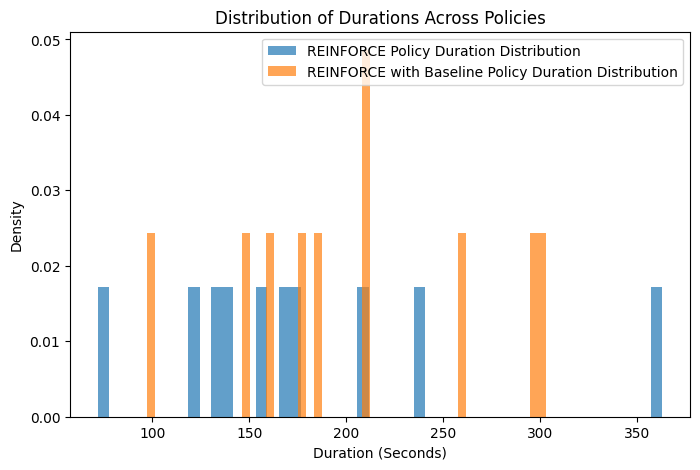

In [98]:
plot_duration_distribution_across_policies(policy_results_list=section1_policies, labels=section1_labels)

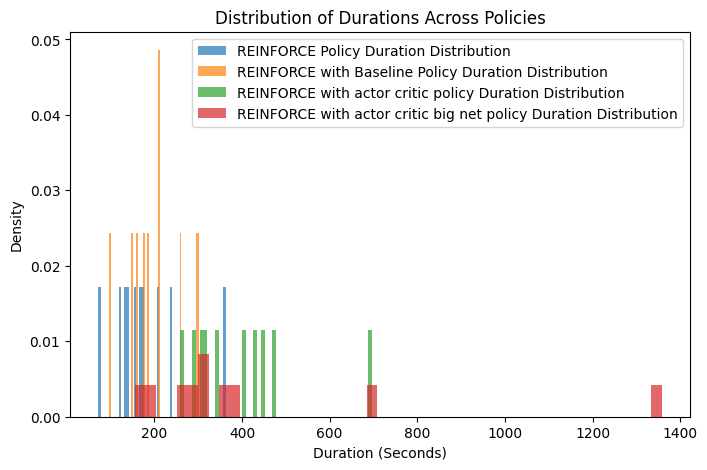

In [99]:
plot_duration_distribution_across_policies(policy_results_list=section2_policies, labels=section2_labels)

### Compare Policies Solved Episodes

In [100]:
import numpy as np

def average_solved_episodes_n_policies(policy_results_list, labels):
    """
    Computes and prints the average number of solved episodes for n different policies.

    Parameters:
    - policy_results_list: A list of lists, where each inner list contains dictionaries for a policy, with each dictionary containing a 'Solved' key indicating the episode number where the policy solved the task (-1 if not solved).
    - labels: A list of string labels for each policy.
    """
    if len(policy_results_list) != len(labels):
        raise ValueError("The number of policy results and labels must match.")
    
    for policy_results, label in zip(policy_results_list, labels):
        solved_episodes = [result['Solved'] for result in policy_results if result['Solved'] != -1]
        average_solved = np.mean(solved_episodes) if solved_episodes else 'None'
        print(f"Average solved episode ({label}):", average_solved)
        

def plot_solved_distribution_across_policies(policy_results_list, labels):
    """
    Plots the distribution of 'Solved' episodes for each policy, considering all models.
    
    Parameters:
    - policy_results_list: A list where each item represents a policy and contains a list of dictionaries,
      each dictionary corresponding to a model's results.
    - labels: A list of string labels for each policy.
    """
    plt.figure(figsize=(8, 5))
    
    for policy_results, label in zip(policy_results_list, labels):
        # Extract all 'Solved' values from all models within this policy
        all_solved = []
        for model_results in policy_results:
            # Only include solved episodes (ignoring -1 or similar indicators for unsolved)
            if model_results['Solved'] != -1:
                all_solved.append(model_results['Solved'])
        
        # Plot the distribution of 'Solved' episodes for this policy if there are any solved instances
        if all_solved:
            plt.hist(all_solved, bins=50, alpha=0.7, label=f'{label} Solved Episodes Distribution', density=True)
    
    plt.xlabel('Solved Episode')
    plt.ylabel('Density')
    plt.title('Distribution of Solved Episodes Across Policies')
    plt.legend()
    plt.show()

In [101]:
average_solved_episodes_n_policies(section1_policies, section1_labels)

Average solved episode (REINFORCE Policy): 932.1
Average solved episode (REINFORCE with Baseline Policy): 621.8


In [102]:
average_solved_episodes_n_policies(section2_policies, section2_labels)

Average solved episode (REINFORCE Policy): 932.1
Average solved episode (REINFORCE with Baseline Policy): 621.8
Average solved episode (REINFORCE with actor critic policy): 2621.0
Average solved episode (REINFORCE with actor critic big net policy): 1132.7


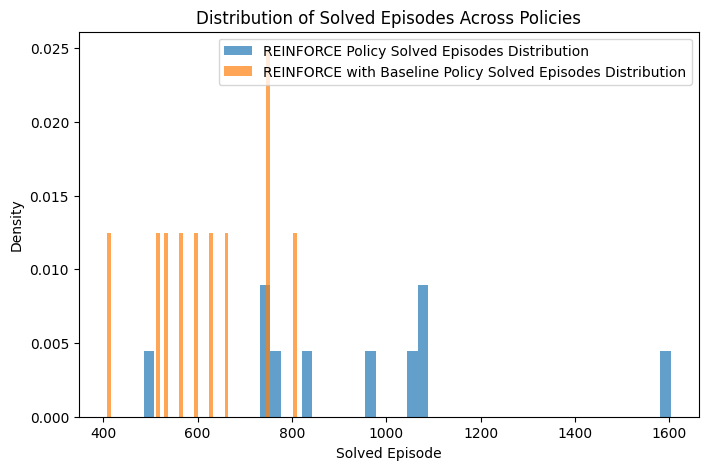

In [103]:
plot_solved_distribution_across_policies(section1_policies, section1_labels)

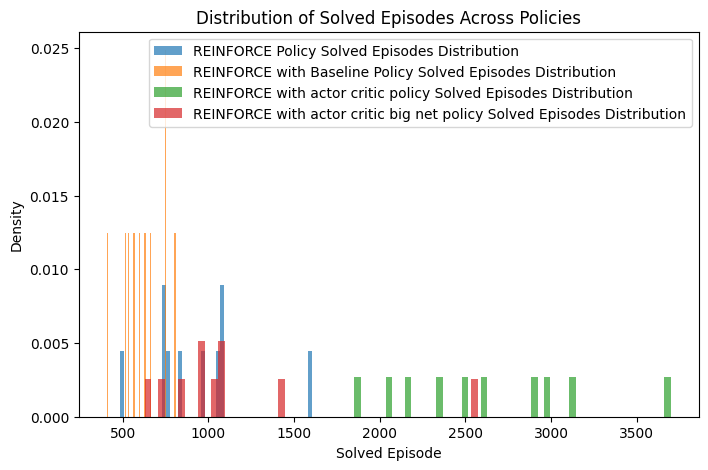

In [104]:
plot_solved_distribution_across_policies(section2_policies, section2_labels)

### Compare Policies Reward

In [105]:

def average_rewards_n_policies(policy_results_list, labels, last_n_episodes=100):
    """
    Computes and prints the average reward over the last n episodes for multiple policies.

    Parameters:
    - policy_results_list: A list of lists, where each inner list contains dictionaries for a policy, with each dictionary containing a 'Reward' key that is a list of rewards for each episode.
    - labels: A list of string labels for each policy.
    - last_n_episodes: The number of last episodes to calculate the average reward over. Defaults to 100.
    """
    if len(policy_results_list) != len(labels):
        raise ValueError("The number of policy results and labels must match.")
    
    for policy_results, label in zip(policy_results_list, labels):
        # Concatenate rewards from the last n episodes for all results in the policy
        all_rewards = np.concatenate([result['Reward'][-last_n_episodes:] for result in policy_results if len(result['Reward']) >= last_n_episodes])
        average_reward = np.mean(all_rewards) if len(all_rewards) > 0 else 'None'
        print(f"Average reward over last {last_n_episodes} episodes ({label}):", average_reward)
        

def moving_average(data, window_size):
    """Calculates the moving average using a simple sliding window approach."""
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

def plot_best_model_rewards_over_time_with_trend(policy_results_list, labels, window_size=10):
    """
    Plots the reward over time for the best model of each policy with a moving average to smooth the trend.
    
    Parameters:
    - policy_results_list: A list where each item represents a policy and contains a list of dictionaries,
      each dictionary corresponding to a model's results. Each model's result includes 'Reward' and 'Episode'.
    - labels: A list of string labels for each policy.
    - window_size: The size of the window used for calculating the moving average.
    """
    plt.figure(figsize=(8, 5))
    
    for policy_results, label in zip(policy_results_list, labels):
        # Identify the best model as the one with the least number of episodes
        best_model = min(policy_results, key=lambda x: len(x['Reward']))
        
        # Extract the rewards over time for the best model
        rewards_over_time = best_model['Reward']
        
        # Calculate the moving average to smooth the reward trend
        rewards_moving_avg = moving_average(rewards_over_time, window_size)
        
        # Plot the smoothed rewards over time for this model
        plt.plot(range(window_size - 1, len(rewards_over_time)), rewards_moving_avg, label=f'Best of {label} (Trend)')

    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.title('Reward Over Time for Best Model of Each Policy (Smoothed Trend)')
    plt.legend()
    plt.show()

In [106]:
average_rewards_n_policies(section1_policies, section1_labels, last_n_episodes=100)


Average reward over last 100 episodes (REINFORCE Policy): 270.75
Average reward over last 100 episodes (REINFORCE with Baseline Policy): 277.304


In [107]:
average_rewards_n_policies(section2_policies, section2_labels, last_n_episodes=100)

Average reward over last 100 episodes (REINFORCE Policy): 270.75
Average reward over last 100 episodes (REINFORCE with Baseline Policy): 277.304
Average reward over last 100 episodes (REINFORCE with actor critic policy): 174.646
Average reward over last 100 episodes (REINFORCE with actor critic big net policy): 166.981


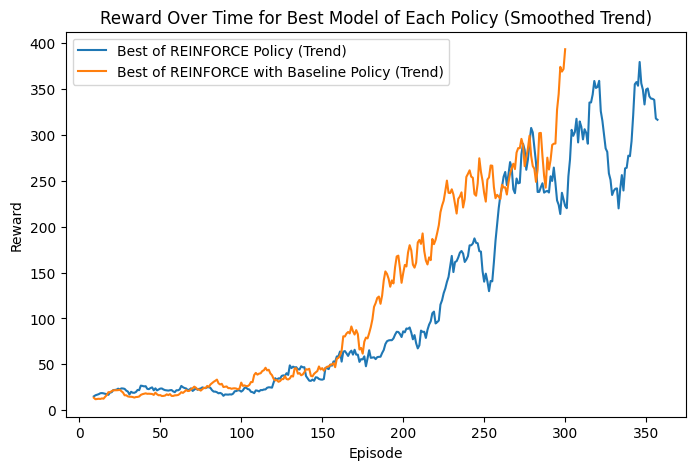

In [108]:
plot_best_model_rewards_over_time_with_trend(section1_policies, section1_labels)

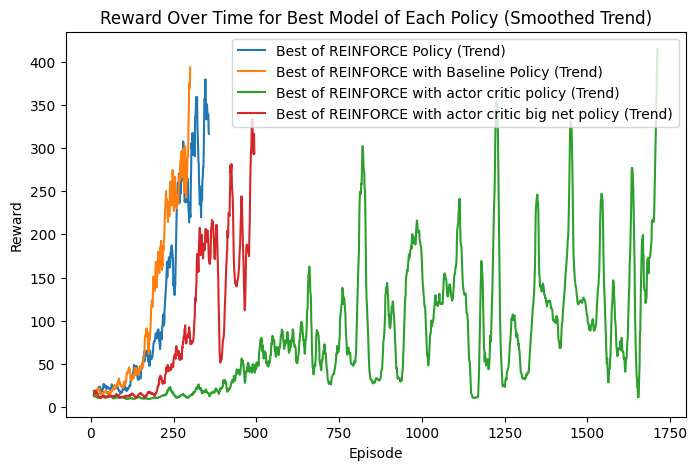

In [109]:
plot_best_model_rewards_over_time_with_trend(section2_policies, section2_labels)


### Compare Policies Loss

In [122]:
def plot_best_model_loss_over_time_with_trend(policy_results_list, labels, window_size=10):
    """
    Plots the loss over time for the best model of each policy, with a moving average to highlight the trend.
    
    Parameters:
    - policy_results_list: A list where each item represents a policy and contains a list of dictionaries,
      each dictionary corresponding to a model's results. Each model's result includes a 'Loss' list for each episode.
    - labels: A list of string labels for each policy.
    - window_size: The size of the window used for calculating the moving average, to smooth the loss trend.
    """
    plt.figure(figsize=(8, 5))
    
    for policy_results, label in zip(policy_results_list, labels):
        # Identify the best model based on the criterion (e.g., least number of episodes)
        best_model = min(policy_results, key=lambda x: len(x['Loss']))
        
        # Extract the loss over time for the best model
        loss_over_time = best_model['Loss']
        
        # Calculate the moving average to smooth the loss trend
        loss_moving_avg = moving_average(loss_over_time, window_size)
        
        # Plot the smoothed loss over time for this model
        plt.plot(range(window_size - 1, len(loss_over_time)), loss_moving_avg, label=f'Best of {label} (Trend)')

        plt.xlabel('Step')
    plt.ylabel('Loss')
    plt.title('Loss Over Time for Best Model of Each Policy (Smoothed Trend)')
    plt.legend()
    plt.show()
    
    
def calculate_and_print_average_losses(policy_results_list, labels):
    """
    Calculates, prints, and returns the average policy loss and, if applicable, the average value network loss for each policy.

    Parameters:
    - policy_results_list: A list of lists, where each inner list contains dictionaries for a policy's models,
      each dictionary containing a list of loss values ('Loss') and optionally value network loss values ('LossV') for each episode.
    - labels: A list of string labels for each policy, used for identification.

    Returns:
    - A dictionary with each policy label as the key and its average losses as the values (including both 'Loss' and 'LossV' if applicable).
    """
    average_loss_dict = {}
    for policy_results, label in zip(policy_results_list, labels):
        # Calculate and print the average policy loss
        all_policy_losses = np.concatenate([model['Loss'] for model in policy_results])
        avg_policy_loss = np.mean(all_policy_losses)
        print(f"Average policy network loss for {label}: {avg_policy_loss:.4f}")
        average_loss_dict[label] = {'Loss': avg_policy_loss}
        
        # Check if 'LossV' is present and calculate the average value network loss
        if any('LossV' in model for model in policy_results):
            all_value_losses = np.concatenate([model['LossV'] for model in policy_results if 'LossV' in model])
            avg_value_loss = np.mean(all_value_losses)
            print(f"Average value network loss for {label}: {avg_value_loss:.4f}")
            average_loss_dict[label]['LossV'] = avg_value_loss
    

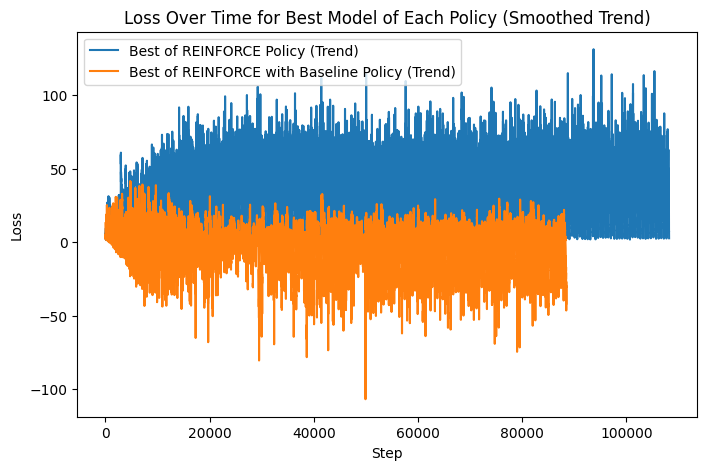

In [111]:
plot_best_model_loss_over_time_with_trend(section1_policies, section1_labels)

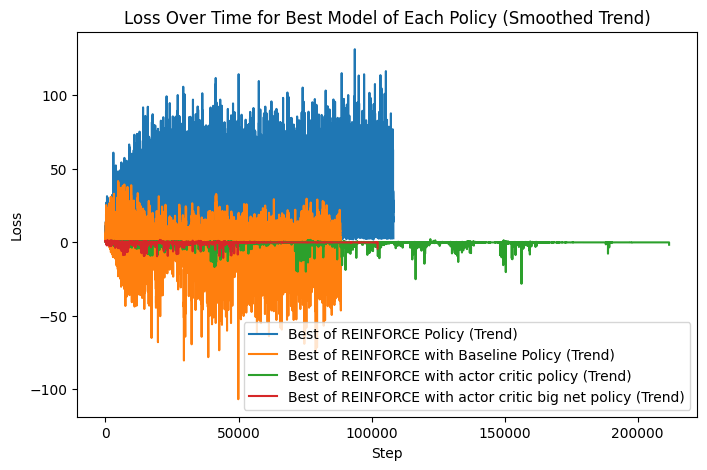

In [112]:
plot_best_model_loss_over_time_with_trend(section2_policies, section2_labels)

In [123]:
calculate_and_print_average_losses(section1_policies, section1_labels)

Average policy network loss for REINFORCE Policy: 40.6841
Average policy network loss for REINFORCE with Baseline Policy: 0.3793
Average value network loss for REINFORCE with Baseline Policy: 500.9605


In [124]:
calculate_and_print_average_losses(section2_policies, section2_labels)


Average policy network loss for REINFORCE Policy: 40.6841
Average policy network loss for REINFORCE with Baseline Policy: 0.3793
Average value network loss for REINFORCE with Baseline Policy: 500.9605
Average policy network loss for REINFORCE with actor critic policy: -0.0362
Average value network loss for REINFORCE with actor critic policy: 13.4166
Average policy network loss for REINFORCE with actor critic big net policy: -0.0149
Average value network loss for REINFORCE with actor critic big net policy: 2.1839
